In [1]:
import PyCC
import numpy as np
import matplotlib.pyplot as plt

def plot_pretty(dpi=200,fontsize=10):
    plt.rcParams['figure.dpi']= dpi
    plt.rc("savefig", dpi=dpi)
    plt.rc('font', size=fontsize)
    plt.rc('xtick', direction='in')
    plt.rc('ytick', direction='in')
    plt.rc('xtick.major', pad=5)
    plt.rc('xtick.minor', pad=5)
    plt.rc('ytick.major', pad=5)
    plt.rc('ytick.minor', pad=5)
    plt.rc('lines', dotted_pattern = [2., 2.])
    plt.rc('legend',fontsize=5)
    plt.rcParams['figure.figsize'] = [5, 3]

plot_pretty()

In [2]:
n = 1000
G = 1
rs = 1
c = 1
ps = 1
Rvir = c*rs
nsteps = 20
atol = 1e-8

df = PyCC.Distributions.NFW(n,rs,ps,c,100,1)
particle_mass = df.loc[:,"mass"][0]

In [3]:
dt,tol = PyCC.find_timestep(df,1e-4,atol=atol,eps=0,G=1,precision="f4",accelerate=True)
print("dt =",dt,"tol =",tol)

dt = 0.0001 tol = 0.0


In [4]:
outdf,stats = PyCC.evaluate(df,nsteps,0,1,dt,precision="f4",accelerate=False)
print(stats)

out = PyCC.outdf2numpy(outdf)

vels = out["vel"]
speeds = np.linalg.norm(vels,axis=2)
kes = (0.5) * particle_mass * (speeds**2)
ke_tot = np.sum(kes,axis=1)

gpes = out["gpe"]
gpe_tot = np.sum(gpes,axis=1).flatten()/2

tot = ke_tot + gpe_tot

{'eval_time': 0.21738233400000695}


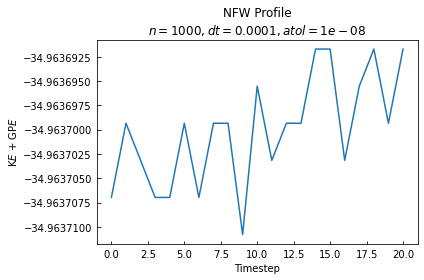

In [5]:
plt.plot(tot)
plt.title("NFW Profile\n" + r"$n=" + str(n) + r",dt=" + str(dt) + r",atol=" + str(atol) + r"$")
plt.ticklabel_format(axis='both',useOffset=False)
plt.xlabel("Timestep")
plt.ylabel(r"K$E$ + GP$E$")
plt.tight_layout()
#plt.savefig("NFW_n100000_steps200.jpg")
plt.show()